In [10]:
import pandas as pd
import numpy as np

In [11]:
data = pd.read_csv("/content/covtype.csv")

In [12]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [13]:
from sklearn.model_selection import train_test_split
Target = 'Cover_Type'
y = data.Cover_Type
X = data.drop([Target], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8 )

In [14]:
X_test, X_valid, y_test, y_valid = train_test_split(X_valid, y_valid, train_size=0.5 )

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
def fit_evaluate_model(model, X_train, y_train, X_valid, Y_valid):
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_valid)
    return accuracy_score(y_valid, y_predicted)

In [17]:
from xgboost import XGBClassifier
import xgboost as xgb

In [18]:
xgb_classifier = XGBClassifier()
xgb_accuracy = fit_evaluate_model(xgb_classifier, X_train, y_train, X_valid, y_valid)
print("Number of correct predictions made out of all predictions are:", xgb_accuracy)

Number of correct predictions made out of all predictions are: 0.7448624832191663


In [19]:
xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.05,  random_state=0, )
xgb_model.fit(X_train, y_train, early_stopping_rounds = 10, eval_set=[(X_valid, y_valid)])

[0]	validation_0-merror:0.316874
Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.314533
[2]	validation_0-merror:0.312812
[3]	validation_0-merror:0.311366
[4]	validation_0-merror:0.310316
[5]	validation_0-merror:0.310488
[6]	validation_0-merror:0.310196
[7]	validation_0-merror:0.309611
[8]	validation_0-merror:0.310506
[9]	validation_0-merror:0.309697
[10]	validation_0-merror:0.310351
[11]	validation_0-merror:0.310007
[12]	validation_0-merror:0.308785
[13]	validation_0-merror:0.307976
[14]	validation_0-merror:0.306822
[15]	validation_0-merror:0.305996
[16]	validation_0-merror:0.305308
[17]	validation_0-merror:0.304895
[18]	validation_0-merror:0.30338
[19]	validation_0-merror:0.303811
[20]	validation_0-merror:0.303811
[21]	validation_0-merror:0.302537
[22]	validation_0-merror:0.302279
[23]	validation_0-merror:0.300764
[24]	validation_0-merror:0.299783
[25]	validation_0-merror:0.298664
[26]	validation_0-merror:0.297081
[27]	validation_0-merror:0

XGBClassifier(learning_rate=0.05, n_estimators=500, objective='multi:softprob')

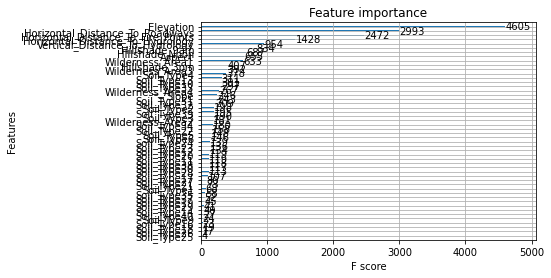

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from xgboost import plot_importance
plot_importance(xgb_model)
plt.rcParams["figure.figsize"] = (24, 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/base.py:234: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


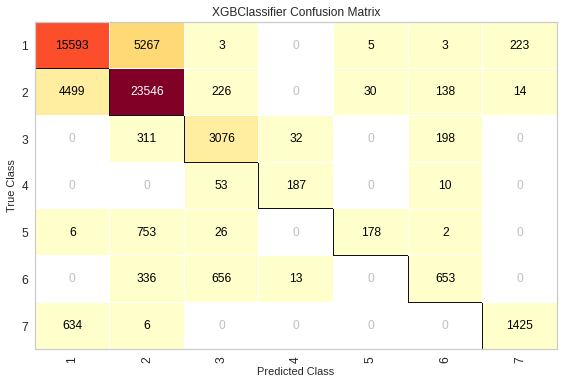

In [21]:
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport
fig, ax = plt.subplots()
cm = ConfusionMatrix(xgb_model,  ax=ax)
cm.score(X_valid, y_valid)
cm.poof()